In [25]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn import metrics

%matplotlib inline

In [26]:
df = pd.read_csv('final_data.csv')
df.drop(columns = ['player', 'team', 'name','position'], inplace = True)
df.dropna(inplace = True)
df.shape

(10754, 18)

In [27]:
df['position_encoded'].unique()

array([1, 2, 3, 4], dtype=int64)

In [28]:
df

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,189.000000,32.0,104,0.000000,0.000000,0.009585,0.0,0.000000,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,196.000000,30.0,15,0.000000,0.000000,0.069018,0.0,0.000000,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,188.000000,37.0,4,0.000000,0.000000,0.000000,0.0,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,175.000000,25.0,82,0.028090,0.056180,0.224719,0.0,0.000000,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,191.000000,30.0,63,0.017889,0.017889,0.053667,0.0,0.000000,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10749,181.240353,20.0,16,0.175953,0.087977,0.263930,0.0,0.000000,0.000000,0.000000,1023,0,0,0,75000,75000,4,1
10750,190.000000,24.0,26,0.372671,0.186335,0.186335,0.0,0.000000,0.000000,0.000000,1449,102,18,0,300000,300000,4,0
10751,181.240353,19.0,20,0.375000,0.000000,0.187500,0.0,0.000000,0.000000,0.000000,960,0,0,0,50000,50000,4,0
10752,181.240353,20.0,17,0.312139,0.104046,0.000000,0.0,0.104046,0.000000,0.000000,865,0,0,0,50000,50000,4,0


In [29]:
df.dtypes

height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = df.drop('position_encoded', axis=1)
y = df['position_encoded']

y_encoded = le.fit_transform(y)

df['position_encoded'] = y_encoded

In [31]:
x_train,x_test,y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [32]:
model = KNeighborsClassifier()

In [33]:
param_grid = {
    'n_neighbors': [2, 3, 4, 5, 6, 7]
}
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_macro', 
                           verbose=1)

In [34]:
# Fit the model on the training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7]}, scoring='f1_macro',
             verbose=1)

In [35]:
grid_search.best_params_

{'n_neighbors': 7}

In [36]:
model = grid_search.best_estimator_

In [37]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7247791724779172

In [39]:
y_pred_train = model.predict(X_train_scaled)
accuracy = accuracy_score(y_train, y_pred_train)
accuracy

0.7949552481692432

In [40]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[234,   5,   5,   2],
       [  7, 572,  79,  48],
       [  4, 139, 415,  61],
       [  5, 140,  97, 338]], dtype=int64)

In [41]:
from sklearn.metrics import classification_report
# Print classification report
print("Classification Report for RF:")
print(classification_report(y_test, y_pred))

Classification Report for RF:
              precision    recall  f1-score   support

           1       0.94      0.95      0.94       246
           2       0.67      0.81      0.73       706
           3       0.70      0.67      0.68       619
           4       0.75      0.58      0.66       580

    accuracy                           0.72      2151
   macro avg       0.76      0.75      0.75      2151
weighted avg       0.73      0.72      0.72      2151



In [42]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='macro')
print(f"Precision: {precision:.2f}")

Precision: 0.76


In [43]:
# Calculate Recall
recall = recall_score(y_test, y_pred, average='macro')
print(f"Recall: {recall:.2f}")

Recall: 0.75


In [44]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='macro')
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.75


In [45]:
print(classification_report(y_test,
                      y_pred,
                      labels=list(model.classes_)))

              precision    recall  f1-score   support

           1       0.94      0.95      0.94       246
           2       0.67      0.81      0.73       706
           3       0.70      0.67      0.68       619
           4       0.75      0.58      0.66       580

    accuracy                           0.72      2151
   macro avg       0.76      0.75      0.75      2151
weighted avg       0.73      0.72      0.72      2151



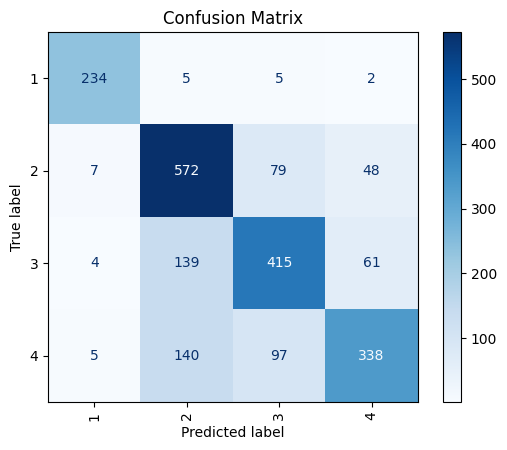

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        display_labels=model.classes_,
                                        cmap="Blues",
                                        xticks_rotation='vertical')
plt.title('Confusion Matrix')
plt.show()

In [47]:
# Print classification report
print("Classification Report for SVM:")
print(classification_report(y_test, y_pred))

Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.94      0.95      0.94       246
           2       0.67      0.81      0.73       706
           3       0.70      0.67      0.68       619
           4       0.75      0.58      0.66       580

    accuracy                           0.72      2151
   macro avg       0.76      0.75      0.75      2151
weighted avg       0.73      0.72      0.72      2151

